# MNE Sample Dataset

In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Download MNE sample data (free)
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(sample_data_raw_file)

#This will download ~1GB of data the first time you run it to a global MNE data folder.
# You can specify a different location by passing the `data_path` parameter to `mne.datasets.sample.data_path()`.

Opening raw data file C:\Users\arash\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Getting some basic information about this dataset:

In [9]:
# Basic information about the dataset
print("Dataset Info:")
print(f"Sampling frequency: {raw.info['sfreq']} Hz")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Duration: {raw.times[-1]:.1f} seconds")
print(f"Channel types: {raw.get_channel_types()[:10]}")

# Show channel names (first 10)
print(f"\nFirst 10 channels: {raw.ch_names[:10]}")

Dataset Info:
Sampling frequency: 150.15374755859375 Hz
Number of channels: 376
Duration: 277.7 seconds
Channel types: ['grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad']

First 10 channels: ['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143']


- Sampling Frequency: The rate at which the waveform data is sampled in order to convert it into a numerical format
- Number of channels: The amount of electrodes capturing brainwave activity
- Channel types: grad (Gradiometers) & mag (Magnometers)

In [10]:
from collections import Counter

# Get detailed channel type breakdown
channel_types = raw.get_channel_types()
print("All channel types:")
print(Counter(channel_types))

# Count each type specifically
eeg_channels = mne.pick_types(raw.info, eeg=True)
meg_grad_channels = mne.pick_types(raw.info, meg='grad')
meg_mag_channels = mne.pick_types(raw.info, meg='mag')
stim_channels = mne.pick_types(raw.info, stim=True)

print(f"\nDetailed breakdown:")
print(f"EEG channels: {len(eeg_channels)}")
print(f"MEG gradiometers: {len(meg_grad_channels)}")
print(f"MEG magnetometers: {len(meg_mag_channels)}")
print(f"Stimulus channels: {len(stim_channels)}")
print(f"Total: {len(raw.ch_names)}")

All channel types:
Counter({'grad': 204, 'mag': 102, 'eeg': 60, 'stim': 9, 'eog': 1})

Detailed breakdown:
EEG channels: 59
MEG gradiometers: 203
MEG magnetometers: 102
Stimulus channels: 9
Total: 376


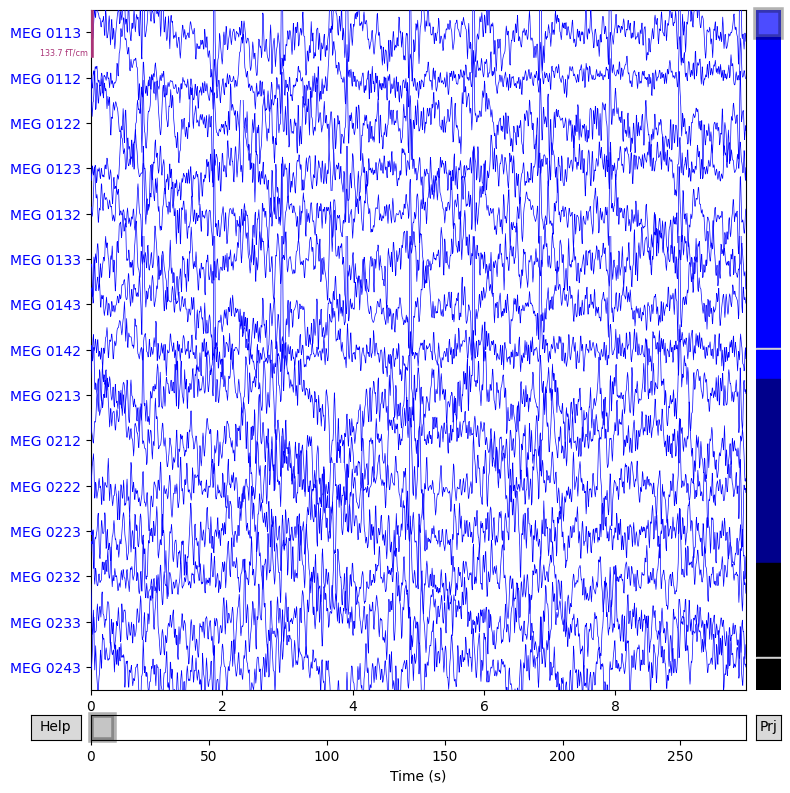

In [11]:
# Plot the raw data (first 10 seconds)
raw.plot(duration=10, n_channels=15, scalings='auto', title='Raw EEG/MEG Data')
plt.show()

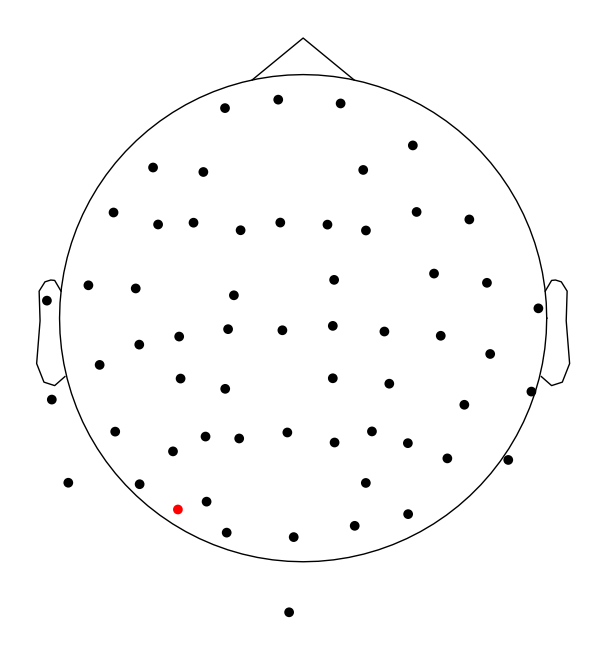

In [12]:
# Look at channel locations (sensor montage)
raw.plot_sensors(ch_type='eeg', title='EEG Electrode Locations')
plt.show()

#The red elecrode is the reference electrode
#This plot only shows EEG electrodes, not MEG sensors.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


c:\Users\arash\Desktop\EEG_Data_Project\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


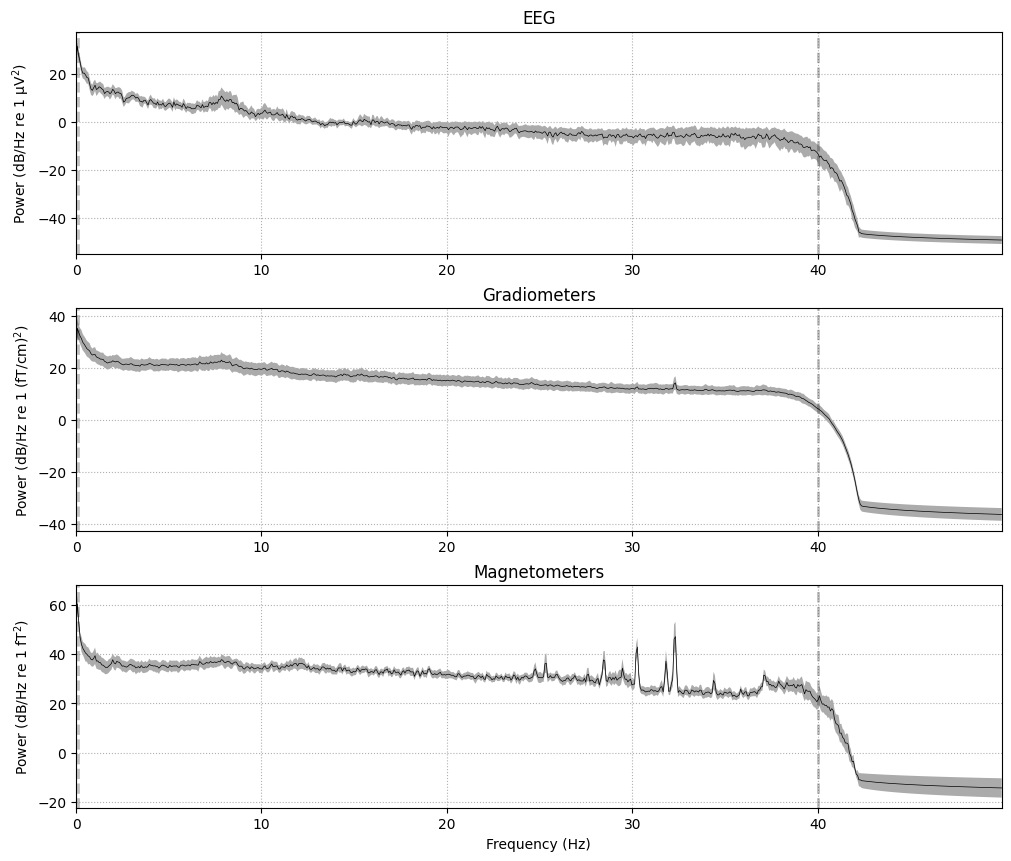

In [13]:
# Power spectral density - see frequency content
raw.plot_psd(fmax=50, average=True)
plt.show()

- At higher frequencies, activity drops off.
- The noise in the 3rd panel is probably due to electrical interference from power lines.

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


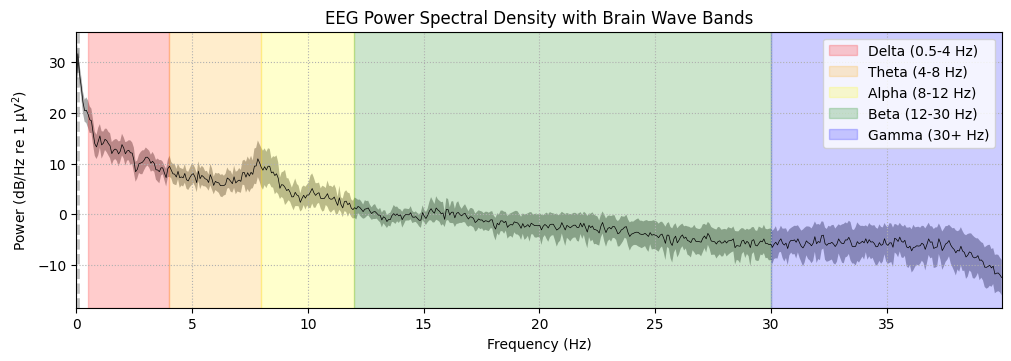

In [14]:
# Let's focus on just EEG and add brain wave annotations
raw_eeg = raw.copy().pick_types(eeg=True)
fig = raw_eeg.plot_psd(fmax=40, average=True, show=False)

# Add brain wave band annotations
ax = fig.axes[0]
ax.axvspan(0.5, 4, alpha=0.2, color='red', label='Delta (0.5-4 Hz)')
ax.axvspan(4, 8, alpha=0.2, color='orange', label='Theta (4-8 Hz)')
ax.axvspan(8, 12, alpha=0.2, color='yellow', label='Alpha (8-12 Hz)')
ax.axvspan(12, 30, alpha=0.2, color='green', label='Beta (12-30 Hz)')
ax.axvspan(30, 40, alpha=0.2, color='blue', label='Gamma (30+ Hz)')
ax.legend()
ax.set_title('EEG Power Spectral Density with Brain Wave Bands')
plt.show()

- This gives you a "frequency fingerprint" of this person's brain activity during the experiment.

Now it is time to move over to the erp_analysis.ipynb, where we will take a look at events and ERPs to see how the brain responds to specific stimuli!